In [11]:
%run Data_v2.ipynb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

size = 40
# X,y,info,oryginal_isotherms = get_data(size, x_range_to_cut=0.05, flat=False);
X,y,info,oryginal_isotherms = get_data(size,data_type_choose='Total_surface_area[m2/g]', flat=False);

folder_name = 'images'
image_folder_path = Path(folder_name)
# image_files = [(file.stem, file.suffix) for file in image_folder_path.iterdir() if file.is_file()]

/home/pc/moje/python_projects/adsorbents_isotherms/Data/all_data.csv
<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 1010
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Article_name                    980 non-null    object 
 1   Figure_number                   980 non-null    object 
 2   Sample_name                     980 non-null    object 
 3   Total_surface_area[m2/g]        897 non-null    float64
 4   Total_pore_volume[cm3/g]        749 non-null    float64
 5   Micropore_volume[cm3/g]         719 non-null    float64
 6   Mesopore_volume[cm3/g]          21 non-null     float64
 7   Average_pore_diameter[nm]       121 non-null    float64
 8   Impregnation_ratio[agent/char]  20 non-null     float64
 9   Activation_type                 33 non-null     object 
 10  Burn_off[%]                     75 non-null     float64
 11  Carbonization_time[h]           

### example of converting the volume of gas adsorbed to the weight of gas adsorbed:

In [12]:
V_ads = 7.5355 # cm3/g - volume of nitrogen adsorbed per gram of adsorbent
V_molar = 22414 # cm3/mol - molar volume of nitrogen at STP
M_N2 = 28.013 # g/mol   molar mass of nitrogen N2
n = V_ads / V_molar # Convert the volume of nitrogen (cm³) to moles of nitrogen
Mass_of_adsorbed_nitrogen = n * M_N2
Mass_of_adsorbed_nitrogen

0.00941786211742661

### linear regression on the linear portion of the plot ( usually between 0.05 < P/P0 < 0.35 )

index = 452, sample = PAC200-2, BETsurface = 631.0
index = 453, sample = PAC200-4, BETsurface = 540.0
index = 454, sample = PAC270-2, BETsurface = 161.0
index = 455, sample = PAC270-4, BETsurface = 77.0
index = 456, sample = PAC550-2, BETsurface = 600.0
index = 457, sample = CAC-NOCarb, BETsurface = 675.0

For Data77: Smaple name=CAC-NOCarb, Graph number=3_2, isotherm_type=I_II BET=675.0
slope s = 5.39962220979616 
intercept i = -0.11665810688010436 
weight of monolayer [g] Wm = 0.18928767648601408 
BET constant C = -45.285872059844365 
Avogadro number N = 6.023e+23 
Adsorbate cross sectional area Acs = 1.62e-19 
Molecular weight of Adsorbate M = 28.0134
Slope(współczynnik kierunkowy)=5.39962220979616 
Intercept(wyraz wolny) =-0.11665810688010436 
r_value=0.9972593437148611 
p_value=2.4601825148296646e-10 
std_err=0.14162984653117772
Total Surface area St = 659.3 [m2]  
Specific sur area (from article): 675.0 [m2/g]


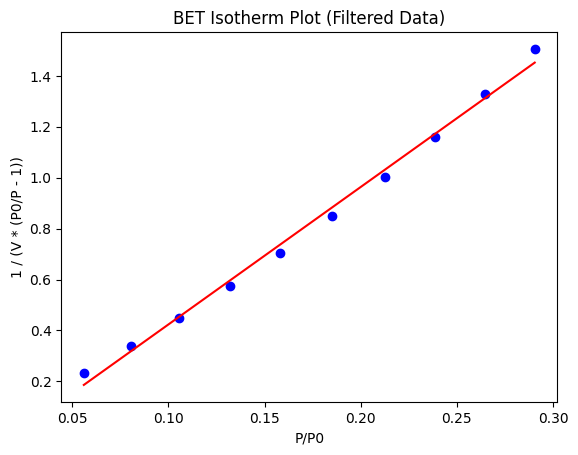

In [13]:
from scipy.stats import linregress
import numpy as np

data_name = 'Data77'
index_of_data = 457

min_x_range = 0.05
max_x_range = 0.3

x_y_v2 = []
for index, isotherm in enumerate(X):
    if(info[index][0] == data_name):
        print(f"index = {index}, sample = {info[index][1]}, BETsurface = {y[index]}")
        
    if(info[index][0] == data_name and index_of_data == index):
        print()
        sample_name = info[index][1]
        graph_number = info[index][2]
        isotherm_type = info[index][3]
        
        print(f'For {data_name}: Smaple name={sample_name}, Graph number={graph_number}, isotherm_type={isotherm_type} BET={y[index]}')
        x_range = 0.1
        
        for i in range(len(isotherm)):
            if(isotherm[i][0] > min_x_range and isotherm[i][0] < max_x_range):
                x_y_v2.append(isotherm[i])
        break
        
x_y = np.array(x_y_v2)
# print(x_y)
P_P0 = x_y[:, 0] # Relative pressure P/P0
volume = x_y[:, 1]
V_molar = 22414 # cm3/mol - molar volume of nitrogen at STP
M_N2 = 28.013 # g/mol   molar mass of nitrogen N2
V = (volume / V_molar) * M_N2
# Calculate the values for column 3: 1 / (Volume * (P0/P - 1))
P0_P = 1 / P_P0  # This gives P0/P for each data point
W = 1/( V * ( P0_P - 1) )

slope, intercept, r_value, p_value, std_err = linregress(P_P0, W) # Perform linear regression to find the slope and intercept

# Add the linear regression line
plt.plot(P_P0, W, 'bo', label="Data Points")
plt.xlabel("P/P0")
plt.ylabel("1 / (V * (P0/P - 1))")
plt.title("BET Isotherm Plot (Filtered Data)")

plt.plot(P_P0, slope * P_P0 + intercept, 'r-', label=f'Linear Fit (slope = {slope:.3f})')

print(f'slope s = {slope} \nintercept i = {intercept} ')

Wm = 1 / (slope + intercept) # weight of monolayer in grams [g]
C = 1 / (intercept * Wm ) # BET constant (C)
N = 6.023e23 # Avogadro's number [molecules/mol]
Acs = 16.2e-20  # Adsorbate cross sectional area (16.2Å^2 for Nitrogen) 1Å^2 = 1×10−20m [m2]
M = 28.0134 # 28.0134 .   Molecular weight of Adsorbate [g/mol]
St = ( (Wm * N * Acs) / M )   # Total Surface area - St [m2]
# specific surface area = St / mass of sample [m2/g]

print(f'weight of monolayer [g] Wm = {Wm} \nBET constant C = {C} \nAvogadro number N = {N} \nAdsorbate cross sectional area Acs = {Acs} \nMolecular weight of Adsorbate M = {M}')

print(f"Slope(współczynnik kierunkowy)={slope} \nIntercept(wyraz wolny) ={intercept} \nr_value={r_value} \np_value={p_value} \nstd_err={std_err}")

print(f'Total Surface area St = {round(St,2)} [m2]  \nSpecific sur area (from article): {y[index]} [m2/g]')